In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
# Загружаем таблицу csv с данными клиентов
amazon_market_data = pd.read_csv('/content/drive/MyDrive/Курс/amazon_market_data.csv')

In [ ]:
# Проверяем загрузку таблицы
amazon_market_data

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,01-01-20,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,01-01-20,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,30-12-20,908,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279
3308,30-12-20,909,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910
3309,30-12-20,1297,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188
3310,30-12-20,1298,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750


In [ ]:
# Получаем информацию о данных таблицы (Количество строк, пропуски, дубликаты)
amazon_market_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    3312 non-null   object 
 1   Row ID        3312 non-null   int64  
 2   Order ID      3312 non-null   object 
 3   Ship Mode     3312 non-null   object 
 4   Customer ID   3312 non-null   object 
 5   Segment       3312 non-null   object 
 6   Country       3312 non-null   object 
 7   City          3312 non-null   object 
 8   State         3312 non-null   object 
 9   Postal Code   3312 non-null   int64  
 10  Region        3312 non-null   object 
 11  Product ID    3312 non-null   object 
 12  Category      3312 non-null   object 
 13  Sub-Category  3312 non-null   object 
 14  Product Name  3312 non-null   object 
 15  Sales         3312 non-null   float64
 16  Quantity      3312 non-null   int64  
 17  Discount      3312 non-null   float64
 18  Profit        3312 non-null 

Всего в таблице 3312 строк и 19 столбцов.

In [ ]:
# Названия столбцов твблицы
amazon_market_data.columns

Index(['Order Date', 'Row ID', 'Order ID', 'Ship Mode', 'Customer ID',
       'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales',
       'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [ ]:
# Для дальнейшей работы переводим названия столбцов в формат camelCase
import re

# Функция перевода в camelCase
def to_camel_case(name):
    name = re.sub(r'\s+', ' ', name)  # убираем лишние пробелы
    parts = re.split(r'\s', name)
    return parts[0].lower() + ''.join(word.capitalize() for word in parts[1:])

# Выведем исходные названия
print("До преобразования:")
print(amazon_market_data.columns.tolist())

# Переименовываем столбцы
new_columns = [to_camel_case(col) for col in amazon_market_data.columns]
amazon_market_data.columns = new_columns

# Выведем новые названия
print("\nПосле преобразования:")
print(amazon_market_data.columns.tolist())

До преобразования:
['Order Date', 'Row ID', 'Order ID', 'Ship Mode', 'Customer ID', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']

После преобразования:
['orderDate', 'rowId', 'orderId', 'shipMode', 'customerId', 'segment', 'country', 'city', 'state', 'postalCode', 'region', 'productId', 'category', 'sub-category', 'productName', 'sales', 'quantity', 'discount', 'profit']


In [ ]:
# Присваиваем таблице для удобства новое название
da = pd.DataFrame(amazon_market_data)

In [ ]:
da.columns

Index(['orderDate', 'rowId', 'orderId', 'shipMode', 'customerId', 'segment',
       'country', 'city', 'state', 'postalCode', 'region', 'productId',
       'category', 'sub-category', 'productName', 'sales', 'quantity',
       'discount', 'profit'],
      dtype='object')

In [ ]:
# Считаем количество уникальных заказов
unique_orders = da['orderId'].nunique()

# Считаем количество уникальных клиентов
unique_customers = da['customerId'].nunique()

# Выводим результаты
print(f"📦 Уникальных заказов: {unique_orders}")
print(f"🧾 Уникальных клиентов: {unique_customers}")

📦 Уникальных заказов: 1687
🧾 Уникальных клиентов: 693


In [ ]:
# Изучаем локации пользователей с построением столючатых диаграмм.
def plot_top_n(column_name, title, top_n=10):
    # Считаем топ-N значений
    top_values = da[column_name].value_counts().head(top_n).reset_index()

    # Переименовываем колонки для ясности
    top_values.columns = [column_name, 'count']

    plt.figure(figsize=(10, 6))
    barplot = sns.barplot(
        data=top_values,
        x=column_name,
        y='count',
        hue=column_name,
        palette='viridis',
        dodge=False,
        legend=False
    )

    plt.title(f'Топ-{top_n} {title}')
    plt.xlabel(title)
    plt.ylabel('Количество клиентов')
    plt.xticks(rotation=45)
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)

    # Подписываем значения на столбцах
    for index, value in enumerate(top_values['count']):
        barplot.text(index, value + 0.01 * top_values['count'].max(), str(value), ha='center', fontsize=10)

    plt.tight_layout()
    plt.show()

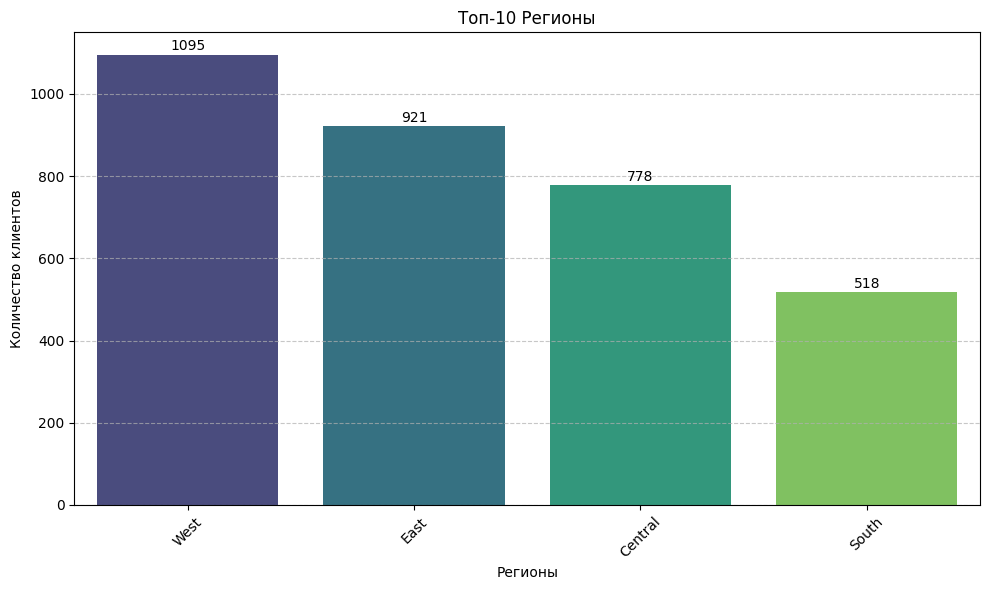

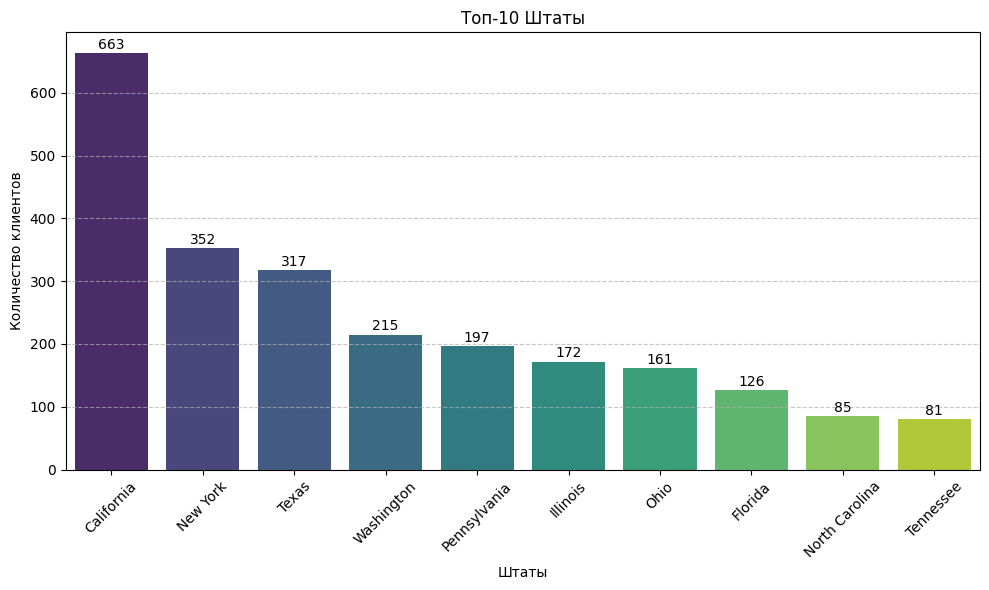

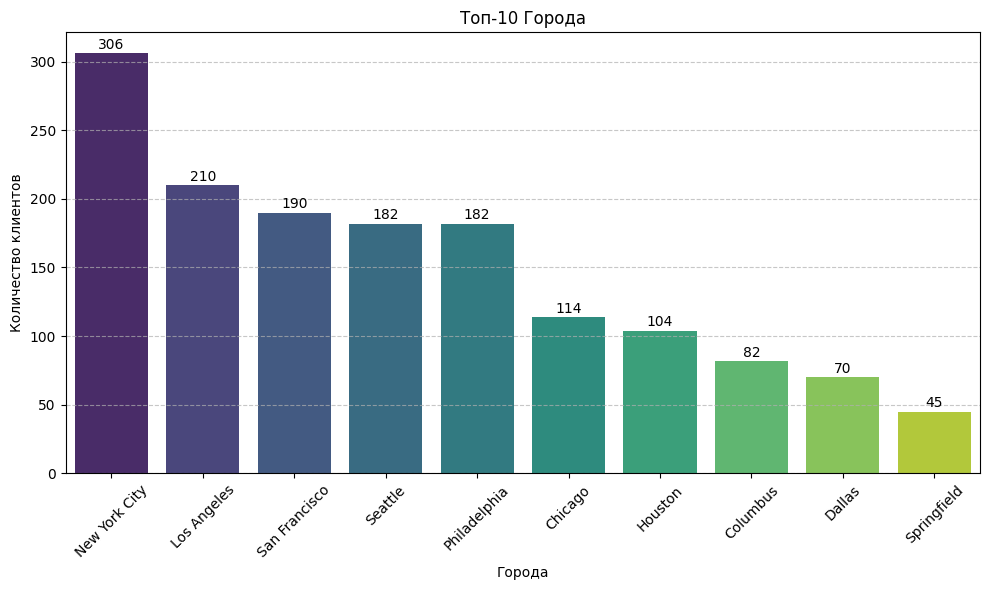

In [ ]:
plot_top_n('region', 'Регионы')
plot_top_n('state', 'Штаты')
plot_top_n('city', 'Города')

Больше всего заказов с западного региона (1095). Лидирующий по заказам штат - Калифорния (663). Больше всего заказов из городов: Нью-Йорк, Лос-Анжелес и Сан-Франциско.

📅 Динамика по месяцам:
orderDate
2020-01-31    155
2020-02-29    107
2020-03-31    238
2020-04-30    203
2020-05-31    242
Freq: ME, dtype: int64


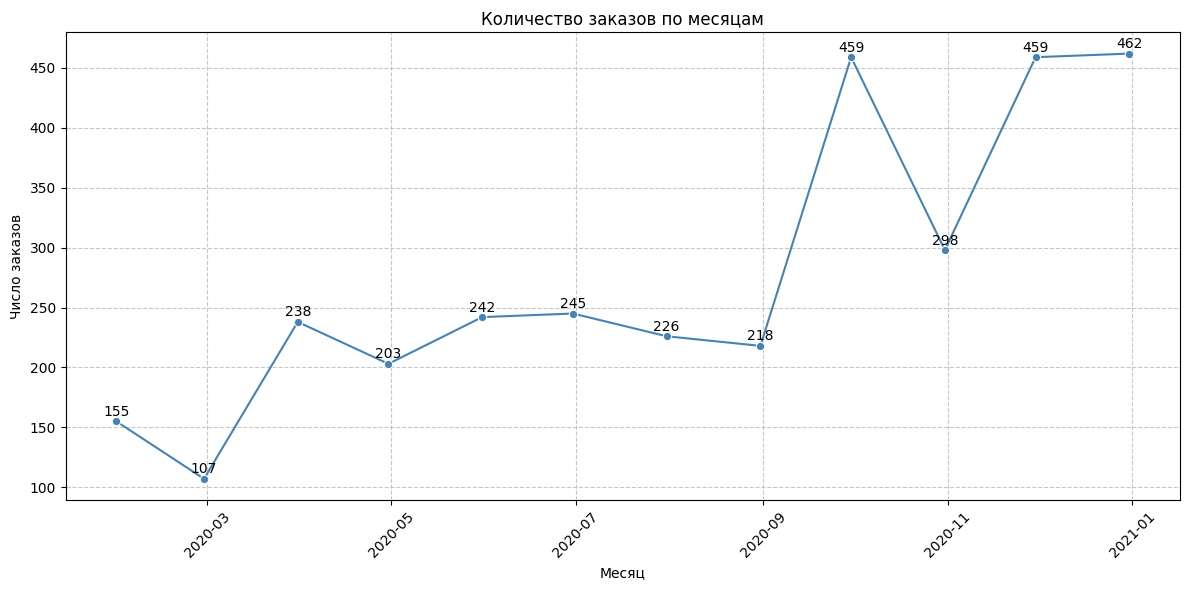

In [ ]:
#____________ Изучаем динамику количества заказов по дате заказа
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Предполагается, что у тебя есть столбец 'orderDate' в формате '%d-%m-%y'

# Шаг 1: Переводим в datetime (указываем точный формат)
da['orderDate'] = pd.to_datetime(da['orderDate'], format='%d-%m-%y', errors='coerce')

# Шаг 2: Группируем по месяцам и считаем количество заказов
orders_by_month = da.resample('ME', on='orderDate').size()  # M = по месяцам

# Шаг 3: Выведем первые значения
print("📅 Динамика по месяцам:")
print(orders_by_month.head())

# Шаг 4: Визуализация — график по месяцам
plt.figure(figsize=(12, 6))
sns.lineplot(
    x=orders_by_month.index,
    y=orders_by_month.values,
    marker='o',
    color='steelblue'
)

# Подписываем точки
for date, value in zip(orders_by_month.index, orders_by_month.values):
    plt.text(date, value + 0.01 * orders_by_month.max(), str(value), ha='center', fontsize=10)

# Оформление графика
plt.title('Количество заказов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Число заказов')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Месяцы сентябрь и декабрь характеризуются значительным увеличением числа заказов . Это может быть связано с рекламными кампаниями, специальными акциями,праздничными периодами. После пиков наблюдается резкое снижение активности, что может быть связано с завершением маркетинговых кампаний или началом нового сезона/периода. После апреля 2020 активность снижается до сентября.

📅 Динамика по месяцам:
orderDate
2020-01-31    155
2020-02-29    107
2020-03-31    238
2020-04-30    203
2020-05-31    242
Freq: ME, dtype: int64


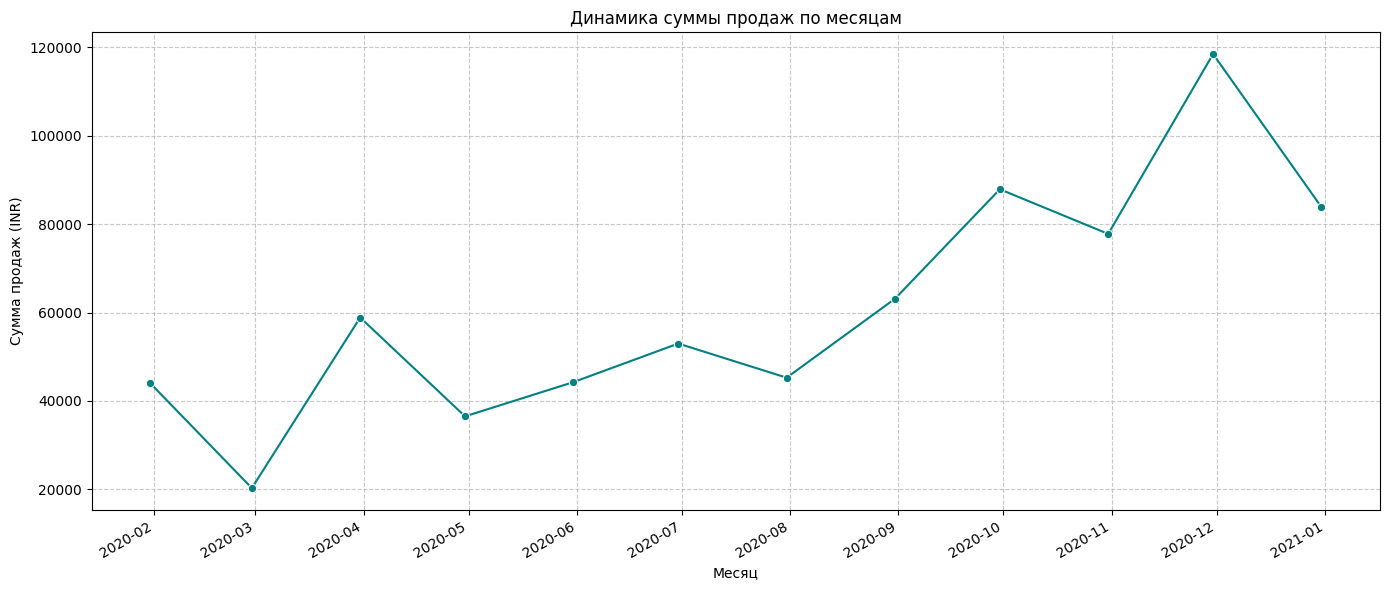


🏆 Месяц с наибольшей суммой продаж: 2020-11
Сумма продаж: 118,447.82 INR


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

sales_by_month = da.resample('ME', on='orderDate')['sales'].sum()
# Шаг 1: Визуализация графика с полной подписью месяцев
plt.figure(figsize=(14, 6))
sns.lineplot(x=sales_by_month.index, y=sales_by_month.values, marker='o', color='teal')



# Шаг 3: Выведем первые значения
print("📅 Динамика по месяцам:")
print(orders_by_month.head())


# Шаг 2: Настраиваем ось X — подписываем все месяцы
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Вращаем подписи для лучшей читаемости
plt.gcf().autofmt_xdate()

# Оформление графика
plt.title('Динамика суммы продаж по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Сумма продаж (INR)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
# Шаг 4: Найдём месяц с максимальной суммой продаж
max_sales_month = sales_by_month.idxmax().strftime('%Y-%m')
max_sales_value = sales_by_month.max()

print(f"\n🏆 Месяц с наибольшей суммой продаж: {max_sales_month}")
print(f"Сумма продаж: {max_sales_value:,.2f} INR")

Месяцы сентябрь и декабрь характеризуются значительным увеличением числа заказов . Это может быть связано с рекламными кампаниями, специальными акциями,праздничными периодами. После пиков наблюдается резкое снижение активности, что может быть связано с завершением маркетинговых кампаний или началом нового сезона/периода. После апреля 2020 активность снижается до сентября.

📅 Динамика суммы продаж по месяцам:
orderDate
2020-01-31    43971.37
2020-02-29    20301.13
2020-03-31    58872.35
2020-04-30    36521.54
2020-05-31    44261.11
Freq: ME, Name: sales, dtype: float64


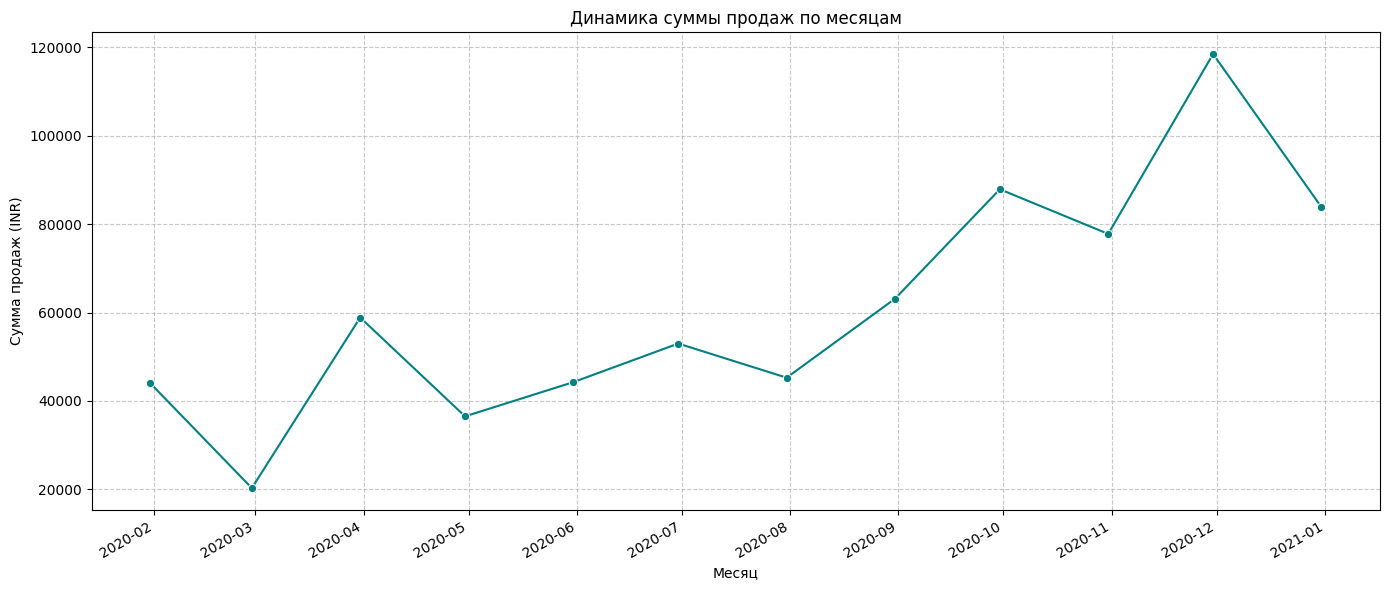


🏆 Месяц с наибольшей суммой продаж: 2020-11
Сумма продаж: 118,447.82 INR


In [ ]:
# Изучим динамику продаж по сумме
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Шаг 1: Убедимся, что orderDate в формате datetime
da['orderDate'] = pd.to_datetime(da['orderDate'], format='%d-%m-%y', errors='coerce')

# Шаг 2: Группируем по месяцам и считаем сумму продаж
sales_by_month = da.resample('ME', on='orderDate')['sales'].sum().round(2)

# Выводим первые значения
print("📅 Динамика суммы продаж по месяцам:")
print(sales_by_month.head())

sales_by_month = da.resample('ME', on='orderDate')['sales'].sum()
# Шаг 1: Визуализация графика с полной подписью месяцев
plt.figure(figsize=(14, 6))
sns.lineplot(x=sales_by_month.index, y=sales_by_month.values, marker='o', color='teal')

# Шаг 2: Настраиваем ось X — подписываем все месяцы
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Вращаем подписи для лучшей читаемости
plt.gcf().autofmt_xdate()

# Оформление графика
plt.title('Динамика суммы продаж по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Сумма продаж (INR)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
# Шаг 4: Найдём месяц с максимальной суммой продаж
max_sales_month = sales_by_month.idxmax().strftime('%Y-%m')
max_sales_value = sales_by_month.max()



print(f"\n🏆 Месяц с наибольшей суммой продаж: {max_sales_month}")
print(f"Сумма продаж: {max_sales_value:,.2f} INR")

Месяцы сентябрь и декабрь характеризуются значительным увеличением числа заказов . Это может быть связано с рекламными кампаниями, специальными акциями,праздничными периодами. После пиков наблюдается резкое снижение активности, что может быть связано с завершением маркетинговых кампаний или началом нового сезона/периода. После апреля 2020 активность снижается до сентября.

In [ ]:
# Переименовываем только нужный столбец
da.rename(columns={'sub-category': 'subCategory'}, inplace=True)

# Проверяем обновлённые колонки
print("📋 Обновлённые столбцы:")
print(da.columns.tolist())

📋 Обновлённые столбцы:
['orderDate', 'rowId', 'orderId', 'shipMode', 'customerId', 'segment', 'country', 'city', 'state', 'postalCode', 'region', 'productId', 'category', 'subCategory', 'productName', 'sales', 'quantity', 'discount', 'profit']


In [ ]:
# Изучим распределение продаж по категориям заказов

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Предполагается, что у тебя есть поля: 'category', 'sub-category', 'sales'

# Шаг 1: Создаем сводную таблицу по category и sub-category
category_sales = da.groupby(['category', 'subCategory'], observed=True)['sales'].sum().reset_index()

# Выводим топ-N строк
print("🧮 Сумма продаж по категориям и подкатегориям:")
print(category_sales.sort_values(by='sales', ascending=False).head(10))


🧮 Сумма продаж по категориям и подкатегориям:
           category  subCategory        sales
16       Technology       Phones  105340.5160
1         Furniture       Chairs   95554.3530
6   Office Supplies      Binders   72788.0450
11  Office Supplies      Storage   69677.6180
14       Technology      Copiers   62899.3880
3         Furniture       Tables   60893.5425
13       Technology  Accessories   59946.2320
15       Technology     Machines   43544.6750
4   Office Supplies   Appliances   42926.9320
0         Furniture    Bookcases   30024.2797


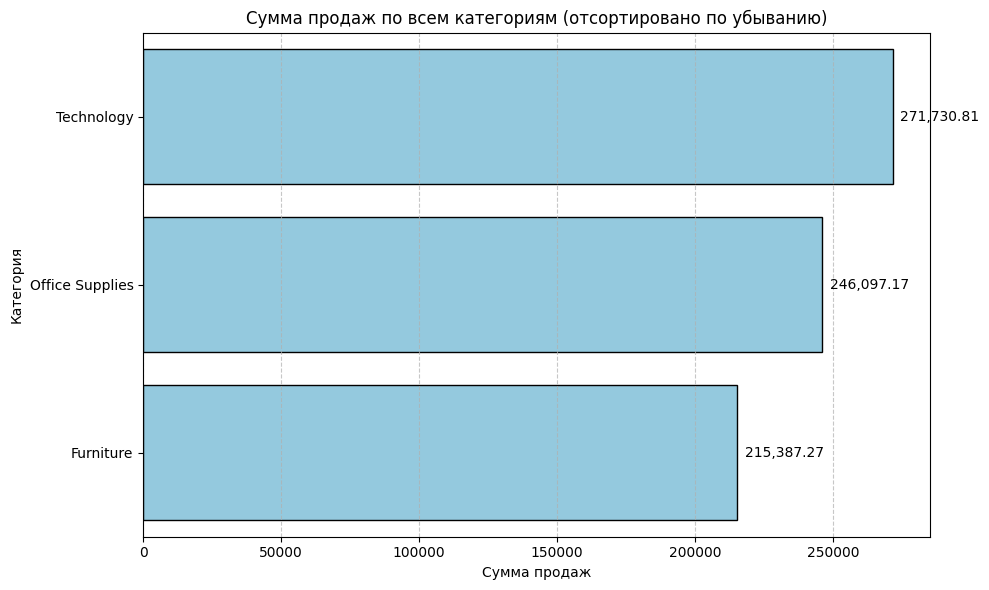

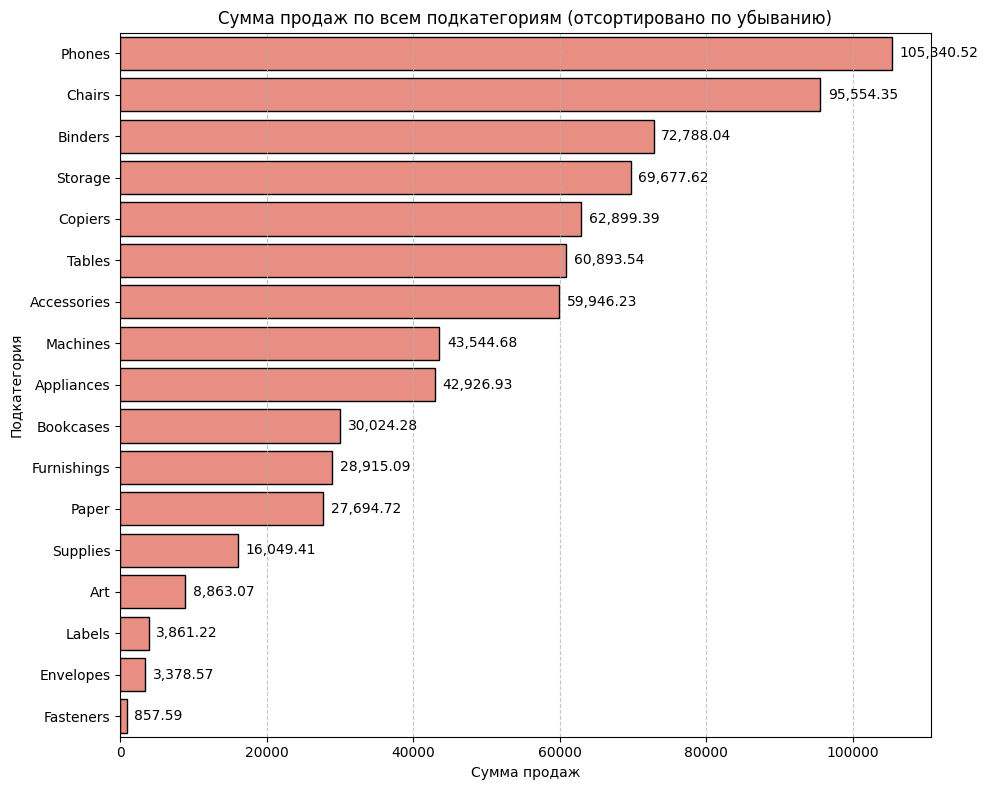

In [ ]:
# Изучим распределение продаж по категориям заказов
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Сумма продаж по категориям (отсортировано по убыванию)
category_sales_sum = (
    category_sales.groupby('category', observed=True)['sales']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

plt.figure(figsize=(10, 6))
barplot1 = sns.barplot(
    data=category_sales_sum,
    x='sales',
    y='category',
    color='skyblue',
    edgecolor='black'
)

plt.title('Сумма продаж по всем категориям (отсортировано по убыванию)')
plt.xlabel('Сумма продаж')
plt.ylabel('Категория')

# Подписываем значения на графике
for index, value in enumerate(category_sales_sum['sales']):
    barplot1.text(value + 0.01 * category_sales_sum['sales'].max(), index, f'{value:,.2f}', va='center', fontsize=10)

plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# 2. Сумма продаж по подкатегориям (отсортировано по убыванию)
subcategory_sales_sum = (
    category_sales.groupby('subCategory', observed=True)['sales']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

plt.figure(figsize=(10, 8))
barplot2 = sns.barplot(
    data=subcategory_sales_sum,
    x='sales',
    y='subCategory',
    color='salmon',
    edgecolor='black'
)

plt.title('Сумма продаж по всем подкатегориям (отсортировано по убыванию)')
plt.xlabel('Сумма продаж')
plt.ylabel('Подкатегория')

# Подписываем значения на графике
for index, value in enumerate(subcategory_sales_sum['sales']):
    barplot2.text(value + 0.01 * subcategory_sales_sum['sales'].max(), index, f'{value:,.2f}', va='center', fontsize=10)

plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Наибольшие продажи в категории Technology (271 730)
Меньше всего продаж в категории Furniture
По подкатегориям самые прибыльные: Phones, Chairs, Binders. (105340)
Наименее прибыльные подкатегории Art, Labels, Envelops, Fasteners(менее 9000)

Изучаем данные кейса по маркетплейсу Amazon.
Уникальных заказов: 1687
Уникальных клиентов: 693
Наибольшее количество заказов - с запада США, из Калифорнии, а также из Нью-Йорка.

Сезонность: Возможно, есть периодичность в пиках активности
Аномалии: Некоторые месяцы имеют значительно большие значения, чем остальные — это требует дополнительного анализа. Нужен анализ причин пиков. Какие факторы привели к таким высоким числам заказов (например, рекламные кампании, праздники).

Для удержания клиентов нужно разработать стратегии, чтобы избежать резкого спада.

Больше прибыли в категориях от продаж высокотехнологичных изделий(электроники), офисных принвдлежностей и меньше всего мебели.
В подкатегориях самые продаваемые телефоны, стулья, Binders